# 📌 Energy Efficiency Prediction Project


## Problem Statement

Buildings consume a significant portion of global energy, largely for heating and cooling purposes. Designing energy-efficient buildings is therefore essential to reduce costs and environmental impact.  

The goal of this project is to **develop a machine learning model** that can accurately predict the **heating load (Y1)** and **cooling load (Y2)** of a building based on its **architectural and structural characteristics (X1–X8)**, such as compactness, surface area, wall/roof area, height, orientation, and glazing features.  

By predicting heating and cooling requirements, architects and engineers can evaluate different building designs in advance and select the most **energy-efficient configurations**, contributing to sustainability and cost savings.  



## 📊 Data Description: Energy Efficiency Dataset  

The dataset consists of **768 building design samples** with **8 input variables (X1–X8)** describing architectural features and **2 output variables (Y1, Y2)** representing energy loads.  

### 🔹 Input Features (X1–X8)  

| Variable | Name                         | Type       | Description                                                                 |
|----------|------------------------------|------------|-----------------------------------------------------------------------------|
| **X1**   | Relative Compactness         | Continuous | Ratio of building volume to surface area. Higher values = more compact.     |
| **X2**   | Surface Area                 | Continuous | Total exterior surface area of the building.                                |
| **X3**   | Wall Area                    | Continuous | Total area of walls in the building.                                        |
| **X4**   | Roof Area                    | Continuous | Total area of the building’s roof.                                          |
| **X5**   | Overall Height               | Continuous | Height of the building (number of floors is implicitly encoded here).       |
| **X6**   | Orientation                  | Categorical (integer) | Cardinal direction building faces (e.g., North, East, South, West). |
| **X7**   | Glazing Area                 | Continuous | Percentage of building façade covered by glass.                             |
| **X8**   | Glazing Area Distribution    | Categorical (integer) | Distribution of glass (e.g., uniform, north, south, east, west).   |

### 🔹 Output Variables (Targets)  

| Variable | Name          | Type       | Description                                  |
|----------|---------------|------------|----------------------------------------------|
| **Y1**   | Heating Load  | Continuous | Energy required to maintain heating demand.  |
| **Y2**   | Cooling Load  | Continuous | Energy required to maintain cooling demand.  |

### 🔹 Dataset Characteristics  

- **Number of instances**: 768  
- **Number of attributes**: 10 (8 inputs + 2 outputs)  
- **Attribute types**: Real-valued (mostly continuous), some categorical (encoded as integers).  
- **Missing values**: None  
- **Source**: UCI Machine Learning Repository – *Energy Efficiency Dataset*  


In [1]:
#importing all essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor ,AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

In [2]:
data=pd.read_csv('Enargy.csv') #load / read dataset

In [3]:
data # Show data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


## Converting data into DataFrame

In [4]:
df=pd.DataFrame(data)

In [5]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [6]:
df.head(10)   #details of top 10 row

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [7]:
df.tail(10)  #details of last 10 row

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
758,0.66,759.5,318.5,220.5,3.5,4,0.4,5,14.92,17.55
759,0.66,759.5,318.5,220.5,3.5,5,0.4,5,15.16,18.06
760,0.64,784.0,343.0,220.5,3.5,2,0.4,5,17.69,20.82
761,0.64,784.0,343.0,220.5,3.5,3,0.4,5,18.19,20.21
762,0.64,784.0,343.0,220.5,3.5,4,0.4,5,18.16,20.71
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [9]:
df.shape

(768, 10)

In [10]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [11]:
df.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object

## Data Cleaning and Preprocessing

In [12]:
df.duplicated() 

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [13]:
df.duplicated().sum()

np.int64(0)

## Finding and Handling null values

In [14]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [15]:
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [16]:
#Renaming Column names
df=df.rename(columns={'X1': 'Relative Compactness','X2': 'Surface Area','X3':'Wall Area','X4':'Roof Area','X5':'Overall Height',
'X6':'Orientation','X7':'Glazing Area','X8':'Glazing Area_Distribution','Y1':'Heating Load','Y2':'Cooling Load', })

In [17]:
df.head(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area_Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Statistical Analysis

In [18]:
# Mean
mean_values = df.mean(numeric_only=True)

# Median
median_values = df.median(numeric_only=True)

# Mode (can be multiple, so we take the first mode)
mode_values = df.mode(numeric_only=True).iloc[0]

# Combine results into one table
stats_df = pd.DataFrame({
    "Mean": mean_values,
    "Median": median_values,
    "Mode": mode_values
})

print("Mean, Median, and Mode of Each Column:")
display(stats_df)

Mean, Median, and Mode of Each Column:


,Mean,Median,Mode
Relative Compactness,0.764167,0.75,0.62
Surface Area,671.708333,673.75,514.50
Wall Area,318.500000,318.50,294.00
Roof Area,176.604167,183.75,220.50
Overall Height,5.250000,5.25,3.50
Orientation,3.500000,3.50,2.00
Glazing Area,0.234375,0.25,0.10
Glazing Area_Distribution,2.812500,3.00,1.00
Heating Load,22.307201,18.95,15.16
Cooling Load,24.587760,22.08,14.27


## EDA - Exploratory Data Analysis (EDA)

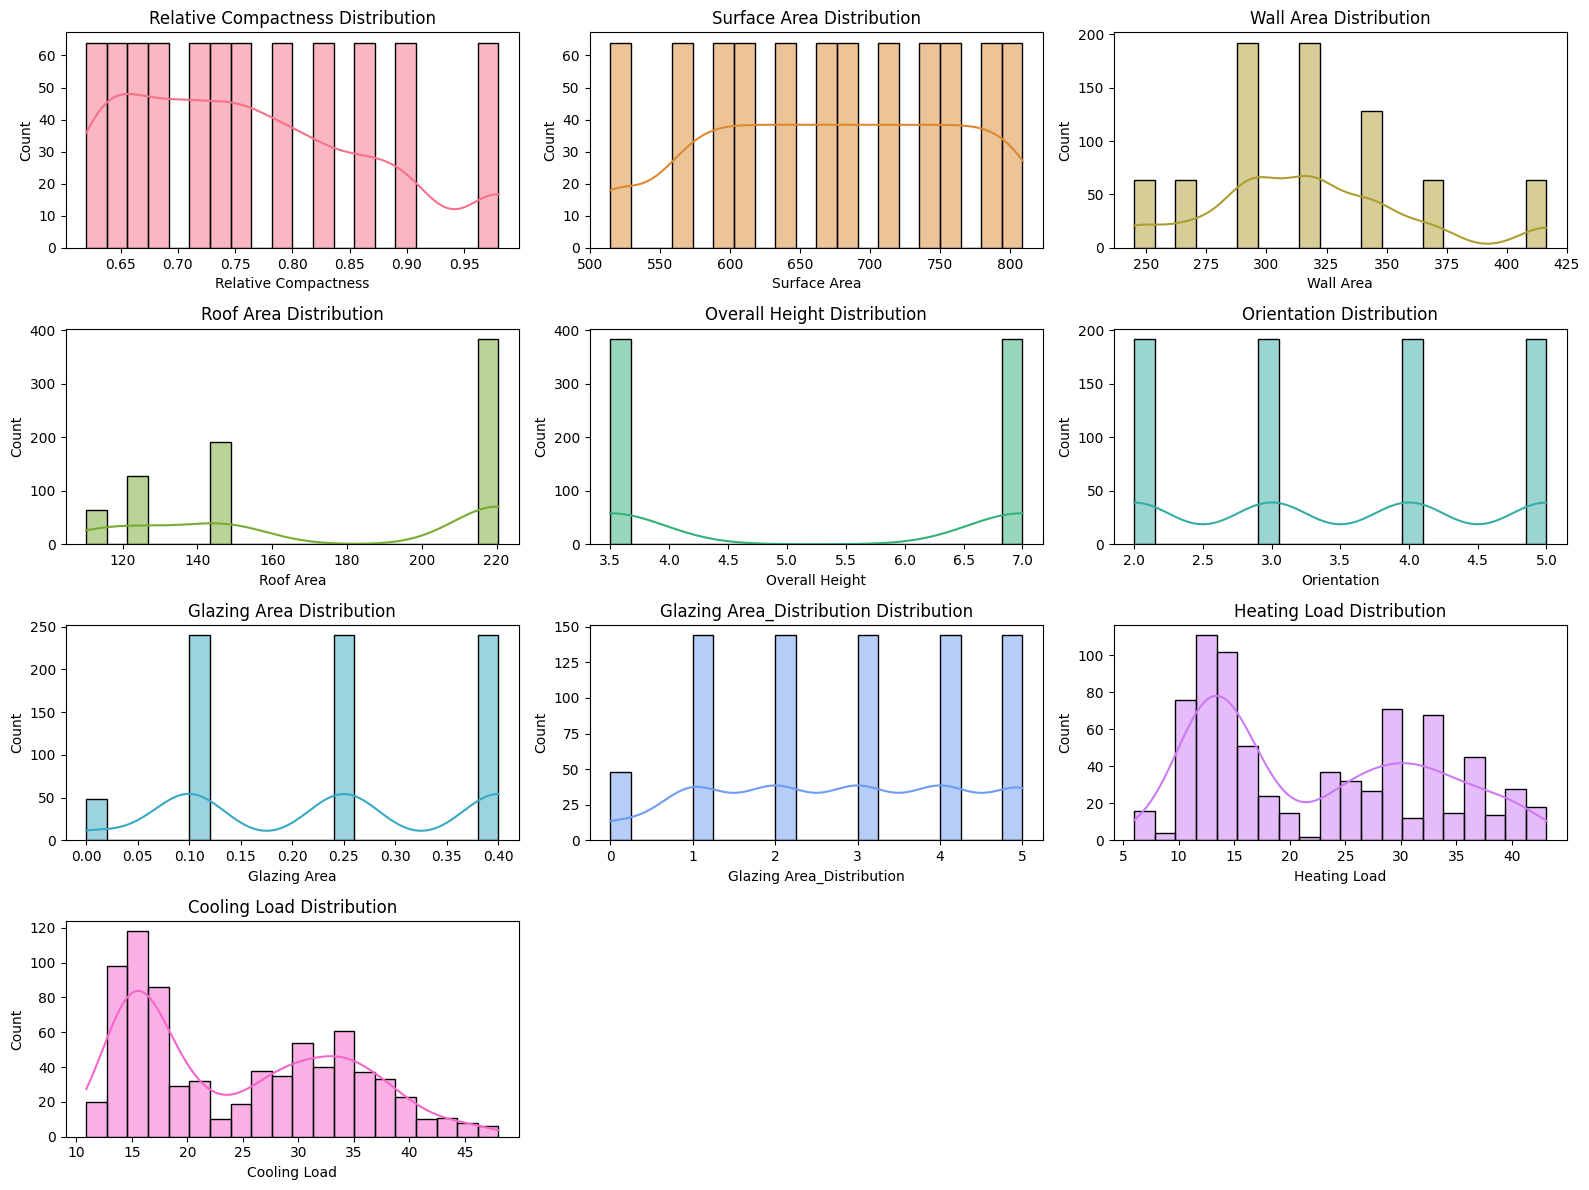

In [23]:
# Select only numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Use a color palette with as many colors as features
colors = sns.color_palette("husl", len(numerical_features))

plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)   # 4 rows × 3 columns
    sns.histplot(df[col], kde=True, color=colors[i-1], bins=20)
    plt.title(f"{col} Distribution", fontsize=12)

plt.tight_layout()
plt.show()

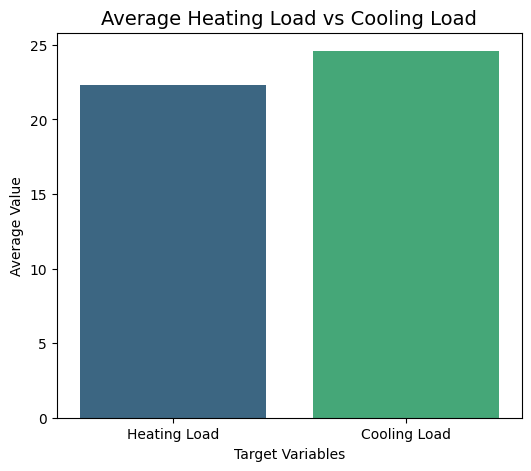

In [25]:
# Compute mean values
mean_values = df[["Heating Load", "Cooling Load"]].mean()

plt.figure(figsize=(6,5))
sns.barplot(x=mean_values.index, y=mean_values.values, palette="viridis")

plt.title("Average Heating Load vs Cooling Load", fontsize=14)
plt.ylabel("Average Value")
plt.xlabel("Target Variables")
plt.show()

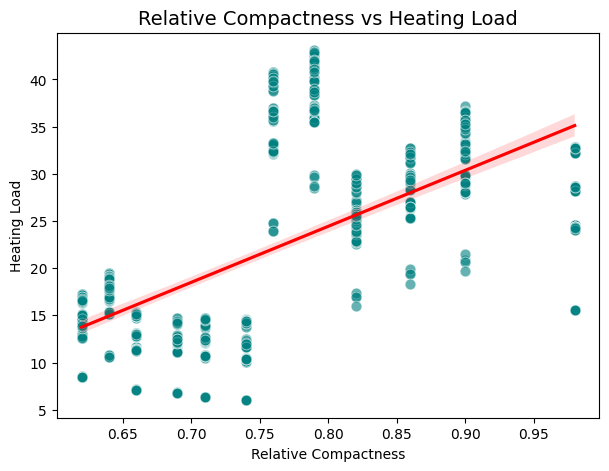

In [26]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="Relative Compactness", 
    y="Heating Load", 
    data=df, color="teal", alpha=0.6, s=60
)
sns.regplot(
    x="Relative Compactness", 
    y="Heating Load", 
    data=df, scatter=False, color="red"
)

plt.title("Relative Compactness vs Heating Load", fontsize=14)
plt.xlabel("Relative Compactness")
plt.ylabel("Heating Load")
plt.show()

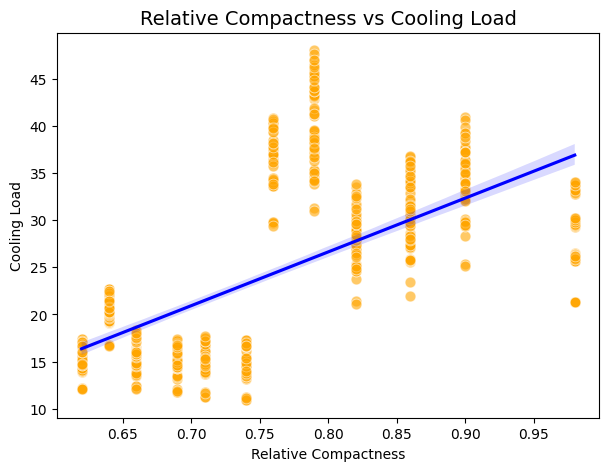

In [27]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="Relative Compactness", 
    y="Cooling Load", 
    data=df, color="orange", alpha=0.6, s=60
)
sns.regplot(
    x="Relative Compactness", 
    y="Cooling Load", 
    data=df, scatter=False, color="blue"
)

plt.title("Relative Compactness vs Cooling Load", fontsize=14)
plt.xlabel("Relative Compactness")
plt.ylabel("Cooling Load")
plt.show()

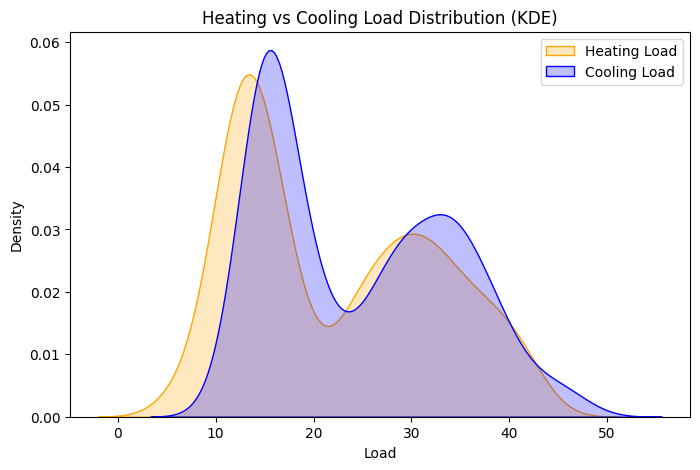

In [28]:
plt.figure(figsize=(8,5))
sns.kdeplot(df["Heating Load"], shade=True, color="orange", label="Heating Load")
sns.kdeplot(df["Cooling Load"], shade=True, color="blue", label="Cooling Load")
plt.title("Heating vs Cooling Load Distribution (KDE)")
plt.xlabel("Load")
plt.ylabel("Density")
plt.legend()
plt.show()

In [29]:
## Checking for Outliers

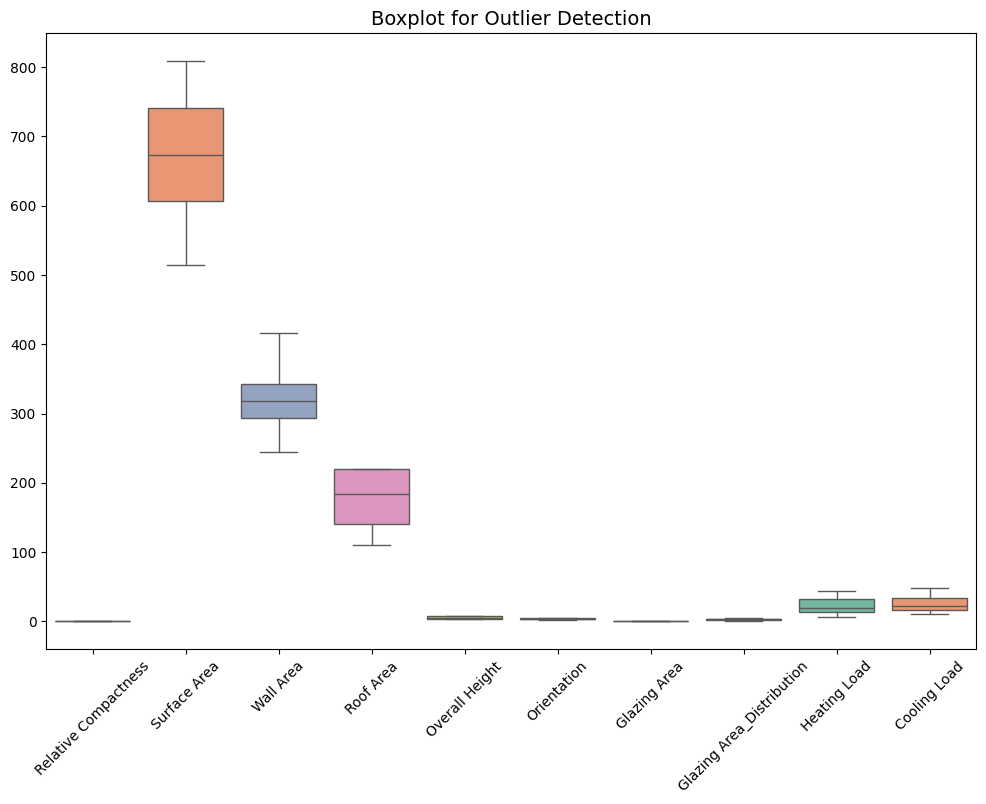

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, palette="Set2")
plt.title("Boxplot for Outlier Detection", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [32]:
cor = df.corr(numeric_only=True)
cor

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area_Distribution,Heating Load,Cooling Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing Area_Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


In [33]:
cor['Heating Load'].sort_values(ascending=False)

Heating Load                 1.000000
Cooling Load                 0.975862
Overall Height               0.889431
Relative Compactness         0.622272
Wall Area                    0.455671
Glazing Area                 0.269841
Glazing Area_Distribution    0.087368
Orientation                 -0.002587
Surface Area                -0.658120
Roof Area                   -0.861828
Name: Heating Load, dtype: float64

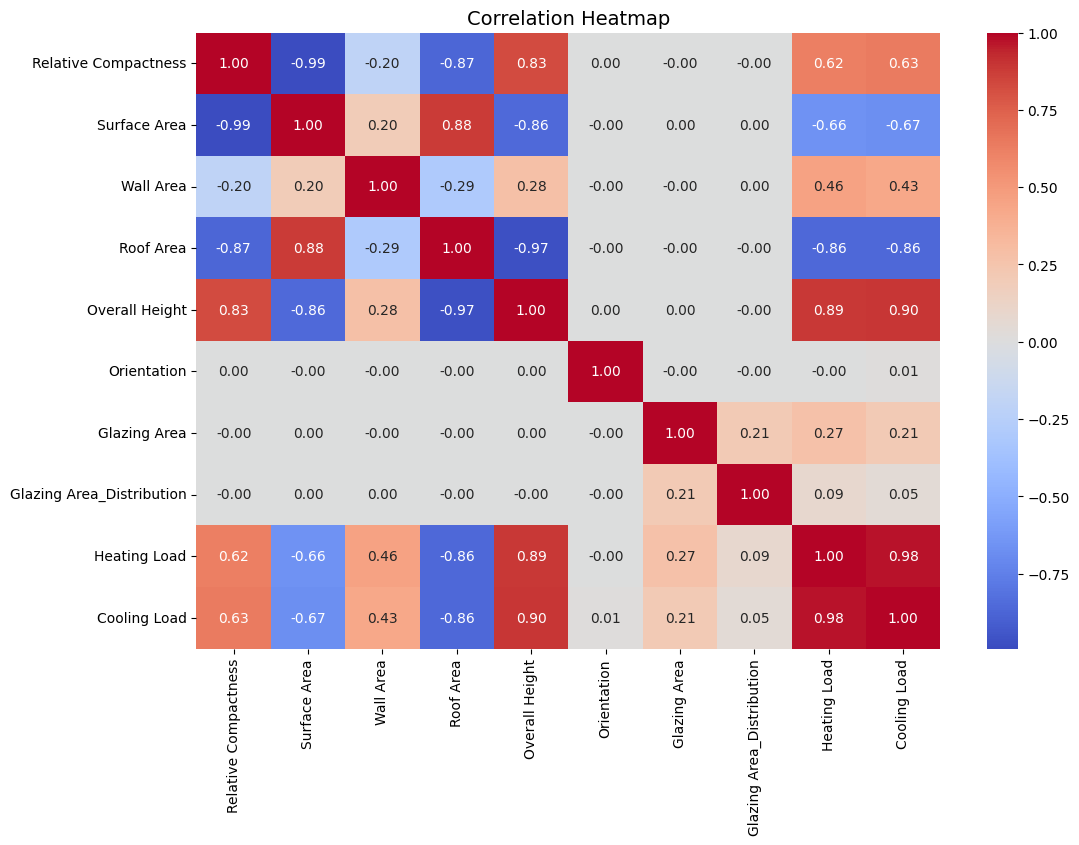

In [34]:
# Display correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [35]:
#Checking for skewness
df= df.select_dtypes(include='number')
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area_Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [36]:
skew = df.skew().sort_values(ascending=False)      #Skew function
skew

Wall Area                    0.533417
Relative Compactness         0.495513
Cooling Load                 0.395992
Heating Load                 0.360449
Orientation                  0.000000
Overall Height               0.000000
Glazing Area                -0.060254
Glazing Area_Distribution   -0.088689
Surface Area                -0.125131
Roof Area                   -0.162764
dtype: float64

In [37]:
kurt = df.kurt().sort_values(ascending=False)      #kurtosis function
kurt

Wall Area                    0.116593
Relative Compactness        -0.706568
Surface Area                -1.059454
Cooling Load                -1.147190
Glazing Area_Distribution   -1.148709
Heating Load                -1.245572
Glazing Area                -1.327629
Orientation                 -1.361042
Roof Area                   -1.776947
Overall Height              -2.005229
dtype: float64

In [38]:
#Skewness by power transformer method
pt=PowerTransformer(method='yeo-johnson')                               # Apply PowerTransformer
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns   #Select only numeric columns

In [39]:
df_transformed = pd.DataFrame(
    pt.fit_transform(df[numeric_cols]),
    columns=numeric_cols
)

In [40]:
df_transformed.skew()

Relative Compactness         0.078956
Surface Area                -0.064732
Wall Area                    0.003415
Roof Area                   -0.161735
Overall Height               0.000000
Orientation                 -0.079905
Glazing Area                -0.051892
Glazing Area_Distribution   -0.164027
Heating Load                -0.022933
Cooling Load                 0.026005
dtype: float64

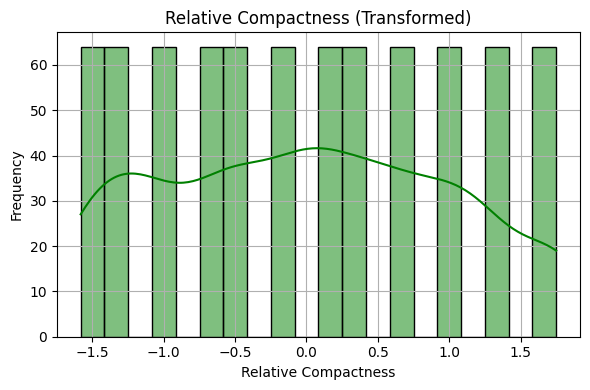

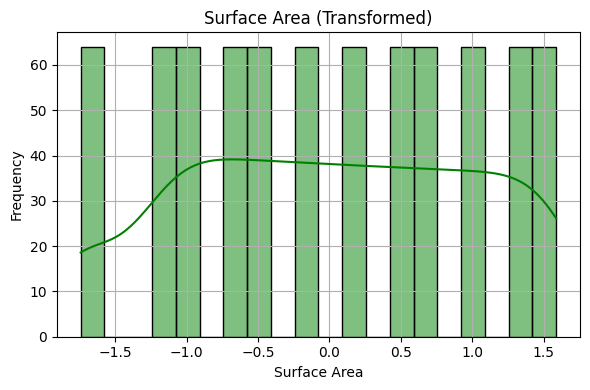

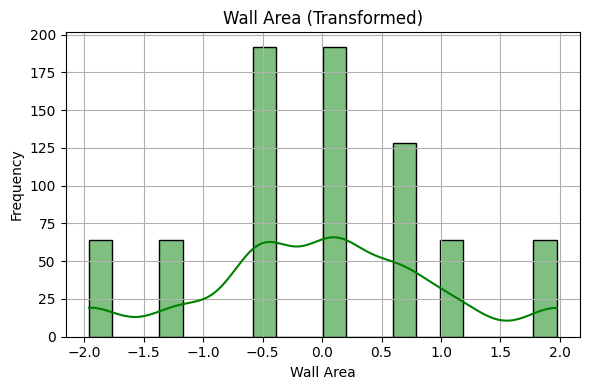

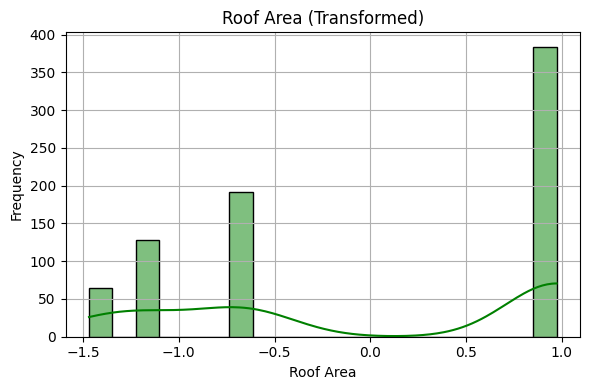

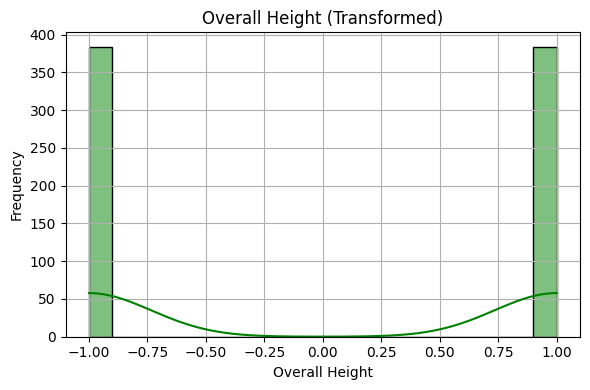

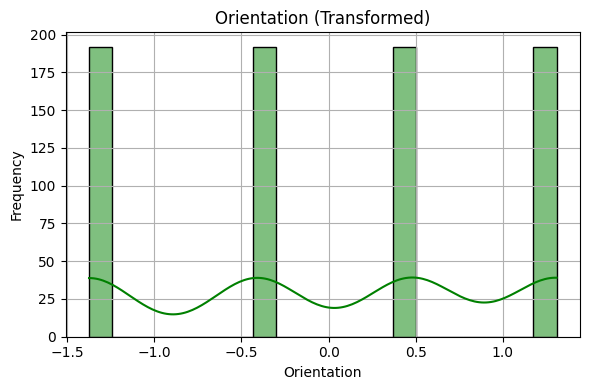

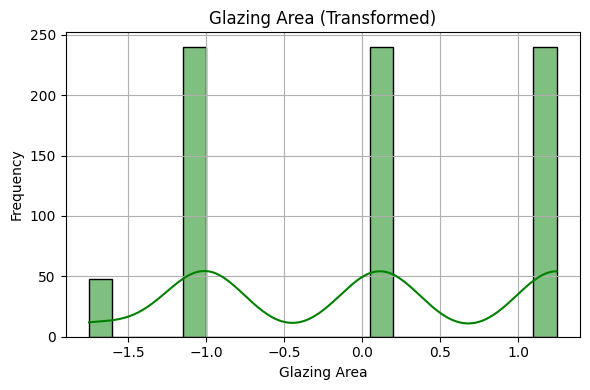

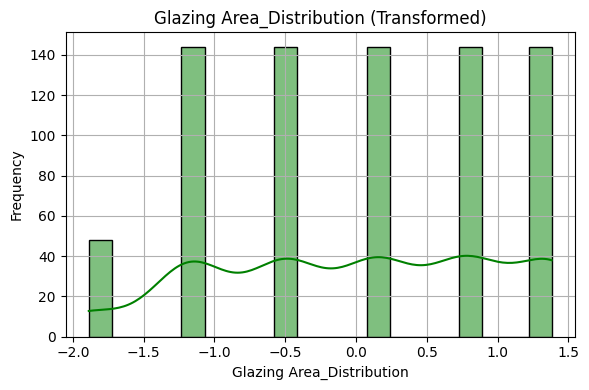

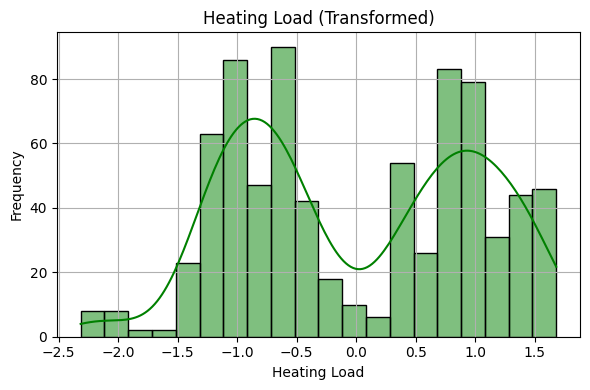

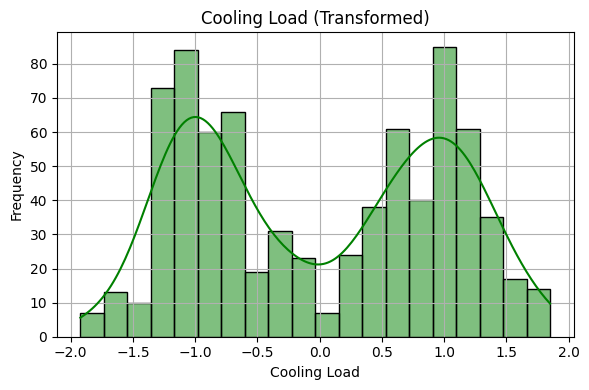

In [41]:
# Plot each numeric column with new color
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_transformed[col], kde=True, bins=20, color='green')
    plt.title(f"{col} (Transformed)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [42]:
df_transformed

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area_Distribution,Heating Load,Cooling Load
0,1.749117,-1.741549,-0.505729,-1.468460,1.0,-1.375048,-1.751908,-1.887750,-0.559916,-0.150715
1,1.749117,-1.741549,-0.505729,-1.468460,1.0,-0.410833,-1.751908,-1.887750,-0.559916,-0.150715
2,1.749117,-1.741549,-0.505729,-1.468460,1.0,0.477143,-1.751908,-1.887750,-0.559916,-0.150715
3,1.749117,-1.741549,-0.505729,-1.468460,1.0,1.308738,-1.751908,-1.887750,-0.559916,-0.150715
4,1.252132,-1.221709,0.097031,-1.198295,1.0,-1.375048,-1.751908,-1.887750,0.047203,0.564404
...,...,...,...,...,...,...,...,...,...,...
763,-1.297699,1.292509,0.636861,0.972689,-1.0,1.308738,1.246607,1.381593,-0.274151,-0.142298
764,-1.580447,1.587859,1.124153,0.972689,-1.0,-1.375048,1.246607,1.381593,-0.434435,-0.758096
765,-1.580447,1.587859,1.124153,0.972689,-1.0,-0.410833,1.246607,1.381593,-0.446824,-0.722645
766,-1.580447,1.587859,1.124153,0.972689,-1.0,0.477143,1.246607,1.381593,-0.441861,-0.800384


In [43]:
#Feature Engineering
#Onehot encoding

In [44]:
ohe=OneHotEncoder(sparse_output=False,drop=None)           # Create encoder
ori = ohe.fit_transform(df[['Orientation']])                 # Fit and transform 'Orientation'
cols= ohe.get_feature_names_out(['Orientation'])             # Extract column names
df_encoded=pd.DataFrame(ori,columns=cols)                  # Convert to DataFrame
df_encoded

,Orientation_2,Orientation_3,Orientation_4,Orientation_5
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
763,0.0,0.0,0.0,1.0
764,1.0,0.0,0.0,0.0
765,0.0,1.0,0.0,0.0
766,0.0,0.0,1.0,0.0


In [45]:
merge=pd.concat([df.drop('Orientation',axis=1), df_encoded],axis=1)
merge= pd.DataFrame(merge)
merge

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area_Distribution,Heating Load,Cooling Load,Orientation_2,Orientation_3,Orientation_4,Orientation_5
0,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33,1.0,0.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33,0.0,1.0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33,0.0,0.0,1.0,0.0
3,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33,0.0,0.0,0.0,1.0
4,0.90,563.5,318.5,122.50,7.0,0.0,0,20.84,28.28,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4,5,17.88,21.40,0.0,0.0,0.0,1.0
764,0.62,808.5,367.5,220.50,3.5,0.4,5,16.54,16.88,1.0,0.0,0.0,0.0
765,0.62,808.5,367.5,220.50,3.5,0.4,5,16.44,17.11,0.0,1.0,0.0,0.0
766,0.62,808.5,367.5,220.50,3.5,0.4,5,16.48,16.61,0.0,0.0,1.0,0.0


In [46]:
gla = ohe.fit_transform(merge[['Glazing Area_Distribution']])
cols= ohe.get_feature_names_out(['Glazing Area_Distribution'])
df_encode=pd.DataFrame(gla,columns=cols)
df_encode

,Glazing Area_Distribution_0,Glazing Area_Distribution_1,Glazing Area_Distribution_2,Glazing Area_Distribution_3,Glazing Area_Distribution_4,Glazing Area_Distribution_5
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
763,0.0,0.0,0.0,0.0,0.0,1.0
764,0.0,0.0,0.0,0.0,0.0,1.0
765,0.0,0.0,0.0,0.0,0.0,1.0
766,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
df1=pd.concat([merge.drop('Glazing Area_Distribution',axis=1), df_encode],axis=1)
df1

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Heating Load,Cooling Load,Orientation_2,Orientation_3,Orientation_4,Orientation_5,Glazing Area_Distribution_0,Glazing Area_Distribution_1,Glazing Area_Distribution_2,Glazing Area_Distribution_3,Glazing Area_Distribution_4,Glazing Area_Distribution_5
0,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.90,563.5,318.5,122.50,7.0,0.0,20.84,28.28,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4,17.88,21.40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
764,0.62,808.5,367.5,220.50,3.5,0.4,16.54,16.88,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
765,0.62,808.5,367.5,220.50,3.5,0.4,16.44,17.11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
766,0.62,808.5,367.5,220.50,3.5,0.4,16.48,16.61,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
df1.shape

(768, 18)

In [49]:
df1.to_csv("balanced dataset.csv",index=False)

In [50]:
#Feature Selection
skb = SelectKBest(score_func=f_regression, k=25)
y = df1['Heating Load']  # continuous target
X = df1.drop('Heating Load', axis=1)
# Select top 25 features
X_new = skb.fit_transform(X, y)
# Get selected feature names
selected_features = X.columns[skb.get_support()]
selected_features                    # Features

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Glazing Area', 'Cooling Load', 'Orientation_2',
       'Orientation_3', 'Orientation_4', 'Orientation_5',
       'Glazing Area_Distribution_0', 'Glazing Area_Distribution_1',
       'Glazing Area_Distribution_2', 'Glazing Area_Distribution_3',
       'Glazing Area_Distribution_4', 'Glazing Area_Distribution_5'],
      dtype='object')

In [51]:
df1.shape

(768, 18)

In [52]:
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': skb.scores_
}).sort_values(by='Score', ascending=False)
feature_scores

,Feature,Score
6,Cooling Load,15294.814350
4,Overall Height,2900.596724
3,Roof Area,2211.624329
1,Surface Area,585.261320
0,Relative Compactness,484.046234
2,Wall Area,200.727661
5,Glazing Area,60.155847
11,Glazing Area_Distribution_0,33.732560
12,Glazing Area_Distribution_1,0.899566
13,Glazing Area_Distribution_2,0.684596


In [53]:
X_selected= X[selected_features]
X_selected

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Cooling Load,Orientation_2,Orientation_3,Orientation_4,Orientation_5,Glazing Area_Distribution_0,Glazing Area_Distribution_1,Glazing Area_Distribution_2,Glazing Area_Distribution_3,Glazing Area_Distribution_4,Glazing Area_Distribution_5
0,0.98,514.5,294.0,110.25,7.0,0.0,21.33,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,0.0,21.33,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,0.0,21.33,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.98,514.5,294.0,110.25,7.0,0.0,21.33,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.90,563.5,318.5,122.50,7.0,0.0,28.28,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4,21.40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
764,0.62,808.5,367.5,220.50,3.5,0.4,16.88,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
765,0.62,808.5,367.5,220.50,3.5,0.4,17.11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
766,0.62,808.5,367.5,220.50,3.5,0.4,16.61,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
X_selected.to_csv('Featured Data.csv',index= False)

In [70]:
X.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Glazing Area', 'Cooling Load', 'Orientation_2',
       'Orientation_3', 'Orientation_4', 'Orientation_5',
       'Glazing Area_Distribution_0', 'Glazing Area_Distribution_1',
       'Glazing Area_Distribution_2', 'Glazing Area_Distribution_3',
       'Glazing Area_Distribution_4', 'Glazing Area_Distribution_5'],
      dtype='object')

In [ ]:
#Scaling

In [55]:
ss= StandardScaler()
X_scaled= ss.fit_transform(X_selected)

## Train Test Split

In [56]:
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=40)

In [57]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train:',y_train.shape)
print('y_test :',y_test.shape)

X_train : (614, 17)
X_test : (154, 17)
y_train: (614,)
y_test : (154,)


In [58]:
y.value_counts()

Heating Load
15.16    6
13.00    5
15.23    4
14.60    4
15.55    4
        ..
16.95    1
17.41    1
17.05    1
18.31    1
19.34    1
Name: count, Length: 586, dtype: int64

## Machine Learning

In [59]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "AdaBoost": AdaBoostRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100)
}

In [60]:
metrics = []
for name, model in models.items():            
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    metrics.append({
        "Model": name,
        "MAE": round(mae, 2),                     #Measures average absolute error.
        "MSE": round(mse, 2),                     #Squared version of errors, penalizes large mistakes.
        "RMSE": round(rmse, 2),                   #Square root of MSE
        "R² Score": round(r2, 4)                  #Measures how well the regression explains variance in target.
    })
# Convert to DataFrame for nice display
results_df = pd.DataFrame(metrics)
print(results_df)

               Model   MAE   MSE  RMSE  R² Score
0  Linear Regression  1.05  2.53  1.59    0.9722
1      Decision Tree  0.33  0.38  0.61    0.9959
2      Random Forest  0.35  0.43  0.65    0.9953
3           AdaBoost  1.20  2.35  1.53    0.9742
4  Gradient Boosting  0.52  0.64  0.80    0.9930


In [61]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),      # Handle missing values (if required)
    ('scaler', StandardScaler()),                       # Feature scaling
    ('model', GradientBoostingRegressor(random_state=42))  # ML model
])
# Train pipeline
pipeline.fit(X_train, y_train)
# Predict
y_pred = pipeline.predict(X_test)

In [62]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n Evaluation Metrics:")
print(f"MAE       : {mae:.2f}")
print(f"MSE       : {mse:.2f}")
print(f"RMSE      : {rmse:.2f}")
print(f"R² Score  : {r2:.4f}")


 Evaluation Metrics:
MAE       : 0.52
MSE       : 0.67
RMSE      : 0.82
R² Score  : 0.9927


In [63]:
#Saving
joblib.dump(pipeline,'Energy.joblib')

['Energy.joblib']

In [64]:
loaded_pipeline=joblib.load('Energy.joblib')

In [71]:
# Creating a single unseen sample with correct feature order
unseen_data = pd.DataFrame([{
    'Relative Compactness': 0.85,
    'Surface Area': 600.0,
    'Wall Area': 300.0,
    'Roof Area': 200.0,
    'Overall Height': 3.5,
    'Glazing Area': 0.25,
    'Cooling Load': 0.0,  # placeholder (if it's a target, keep 0)
    'Orientation_2': 1,
    'Orientation_3': 0,
    'Orientation_4': 0,
    'Orientation_5': 0,
    'Glazing Area_Distribution_0': 0,
    'Glazing Area_Distribution_1': 0,
    'Glazing Area_Distribution_2': 1,
    'Glazing Area_Distribution_3': 0,
    'Glazing Area_Distribution_4': 0,
    'Glazing Area_Distribution_5': 0
}])

print(unseen_data)

   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.85         600.0      300.0      200.0             3.5   

   Glazing Area  Cooling Load  Orientation_2  Orientation_3  Orientation_4  \
0          0.25           0.0              1              0              0   

   Orientation_5  Glazing Area_Distribution_0  Glazing Area_Distribution_1  \
0              0                            0                            0   

   Glazing Area_Distribution_2  Glazing Area_Distribution_3  \
0                            1                            0   

   Glazing Area_Distribution_4  Glazing Area_Distribution_5  
0                            0                            0  
